In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import keras
import tensorflow as tf
import nltk
import re

In [2]:
true=pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
fake=pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')

In [3]:
true.head(10)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true['target']=1
fake['target']=0
news_data=pd.concat([true,fake],ignore_index=True,sort=False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Data distribution of fake and real data')

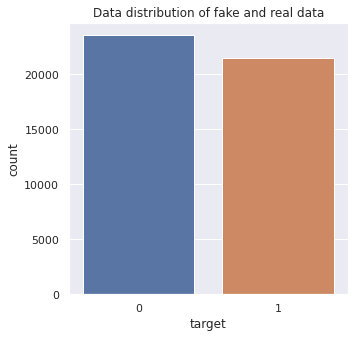

In [7]:
plt.figure(figsize=(5,5))
sns.set(style='darkgrid')
sns.countplot(news_data.target)
plt.title('Data distribution of fake and real data')

Text(0, 0.5, 'total no count')

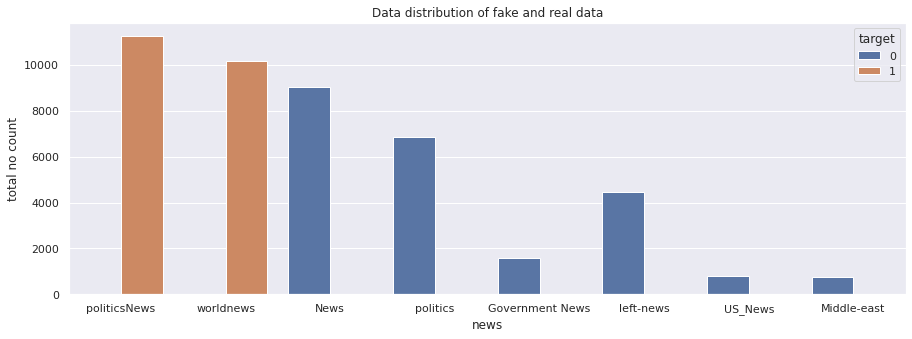

In [8]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
plt.title("Data distribution of fake and real data")
sns.countplot(x='subject',data=news_data,hue='target')
plt.xlabel('news')
plt.ylabel('total no count')

In [9]:
news_data['text']=news_data['title']+''+news_data['text']


In [10]:
data=news_data[['text','target']]

In [13]:
spacy_tok = spacy.load('en_core_web_sm')
sample_data=data.text[100]
sample_data

"Senator Warren hits out at 'effort to politicize' U.S. consumer agencyWASHINGTON (Reuters) - Democratic Senator Elizabeth Warren is taking aim at budget chief Mick Mulvaney’s plan to fill the ranks of the U.S. consumer financial watchdog with political allies, according to letters seen by Reuters, the latest salvo in a broader battle over who should run the bureau. President Donald Trump last month appointed Mulvaney as acting director of the Consumer Financial Protection Bureau (CFPB), though the decision is being legally challenged by the agency’s deputy director, Leandra English, who says she is the rightful interim head. Mulvaney told reporters earlier this month he planned to bring in several political appointees to help overhaul the agency, but Warren warned in a pair of letters sent Monday to Mulvaney and the Office of Personnel Management (OPM), which oversees federal hiring, that doing so was inappropriate and potentially illegal. The CFPB is meant to be an independent agency

In [14]:
parsed_data=spacy_tok(sample_data)
parsed_data

Senator Warren hits out at 'effort to politicize' U.S. consumer agencyWASHINGTON (Reuters) - Democratic Senator Elizabeth Warren is taking aim at budget chief Mick Mulvaney’s plan to fill the ranks of the U.S. consumer financial watchdog with political allies, according to letters seen by Reuters, the latest salvo in a broader battle over who should run the bureau. President Donald Trump last month appointed Mulvaney as acting director of the Consumer Financial Protection Bureau (CFPB), though the decision is being legally challenged by the agency’s deputy director, Leandra English, who says she is the rightful interim head. Mulvaney told reporters earlier this month he planned to bring in several political appointees to help overhaul the agency, but Warren warned in a pair of letters sent Monday to Mulvaney and the Office of Personnel Management (OPM), which oversees federal hiring, that doing so was inappropriate and potentially illegal. The CFPB is meant to be an independent agency 

In [15]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py


--2021-05-06 03:36:38--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896 (6.7K) [text/plain]
Saving to: ‘explacy.py’

explacy.py          100%[===================>]   6.73K  --.-KB/s    in 0s      

2021-05-06 03:36:39 (47.7 MB/s) - ‘explacy.py’ saved [6896/6896]



In [17]:
import explacy
explacy.print_parse_info(spacy_tok,data.text[1])


Dep tree                          Token              Dep type  Lemma              Part of Sp
───────────────────────────────── ────────────────── ───────── ────────────────── ──────────
                              ┌─► U.S.               compound  U.S.               PROPN     
                   ┌┬┬────────┴── military           ROOT      military           NOUN      
                   │││        ┌─► to                 aux       to                 PART      
                   ││└─►┌─────┴── accept             relcl     accept             VERB      
                   ││   │     ┌─► transgender        compound  transgender        NOUN      
                   ││   └─►┌──┴── recruits           dobj      recruit            NOUN      
                   ││      └─►┌── on                 prep      on                 ADP       
                   ││         └─► Monday             pobj      Monday             PROPN     
                   │└───────────► :                  punct     :      

In [18]:
tokenize=pd.DataFrame()
for i,token in enumerate(parsed_data):
    tokenize.loc[i,'text']=token.text
    tokenize.loc[i,'lemma']=token.lemma_
    tokenize.loc[i,'pos']=token.pos_
    tokenize.loc[i,'dep']=token.dep_
    tokenize.loc[i, 'is_punctuation'] = token.is_punct
    tokenize.loc[i, 'shape'] = token.shape_
    tokenize.loc[i, 'is_alpha'] = token.is_alpha
    tokenize.loc[i, 'is_stop'] = token.is_stop
tokenize[:5]

,text,lemma,pos,dep,is_punctuation,shape,is_alpha,is_stop
0,Senator,Senator,PROPN,compound,False,Xxxxx,True,False
1,Warren,Warren,PROPN,nsubj,False,Xxxxx,True,False
2,hits,hit,VERB,ROOT,False,xxxx,True,False
3,out,out,ADP,prt,False,xxx,True,True
4,at,at,ADP,prep,False,xx,True,True


In [19]:
spacy.displacy.render(parsed_data, style='ent')


In [22]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

In [23]:
sentence_spans = list(parsed_data.sents)
sentence_spans

[Senator Warren hits out at 'effort to politicize' U.S. consumer agencyWASHINGTON (Reuters) - Democratic Senator Elizabeth Warren is taking aim at budget chief Mick Mulvaney’s plan to fill the ranks of the U.S. consumer financial watchdog with political allies, according to letters seen by Reuters, the latest salvo in a broader battle over who should run the bureau.,
 President Donald Trump last month appointed Mulvaney as acting director of the Consumer Financial Protection Bureau (CFPB), though the decision is being legally challenged by the agency’s deputy director, Leandra English, who says she is the rightful interim head.,
 Mulvaney told reporters earlier this month he planned to bring in several political appointees to help overhaul the agency, but Warren warned in a pair of letters sent Monday to Mulvaney and the Office of Personnel Management (OPM), which oversees federal hiring, that doing so was inappropriate and potentially illegal.,
 The CFPB is meant to be an independent 

In [29]:
from spacy import displacy
displacy.render(parsed_data[0:20], style='dep', jupyter=True,options={'distance': 140})

In [33]:
news_data['date'] = news_data['date'].replace(['19-Feb-18'],'February 19, 2018')
news_data['date'] = news_data['date'].replace(['18-Feb-18'],'February 18, 2018')
news_data['date'] = news_data['date'].replace(['17-Feb-18'],'February 17, 2018')
news_data['date'] = news_data['date'].replace(['16-Feb-18'],'February 16, 2018')
news_data['date'] = news_data['date'].replace(['15-Feb-18'],'February 15, 2018')
news_data['date'] = news_data['date'].replace(['14-Feb-18'],'February 14, 2018')
news_data['date'] = news_data['date'].replace(['13-Feb-18'],'February 13, 2018')


news_data['date'] = news_data['date'].str.replace('Dec ', 'December ')
news_data['date'] = news_data['date'].str.replace('Nov ', 'November ')
news_data['date'] = news_data['date'].str.replace('Oct ', 'October ')
news_data['date'] = news_data['date'].str.replace('Sep ', 'September ')
news_data['date'] = news_data['date'].str.replace('Aug ', 'August ')
news_data['date'] = news_data['date'].str.replace('Jul ', 'July ')
news_data['date'] = news_data['date'].str.replace('Jun ', 'June ')
news_data['date'] = news_data['date'].str.replace('Apr ', 'April ')
news_data['date'] = news_data['date'].str.replace('Mar ', 'March ')
news_data['date'] = news_data['date'].str.replace('Feb ', 'February ')
news_data['date'] = news_data['date'].str.replace('Jan ', 'January ')

In [35]:
news_data['date'] = news_data['date'].str.replace(' ', '')


In [40]:
for i, val in enumerate(news_data['date']):
    news_data['date'].iloc[i] = pd.to_datetime(news_data['date'].iloc[i], format='%B%d,%Y', errors='coerce') 

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
news_data['date'] = news_data['date'].astype('datetime64[ns]')


In [44]:
import datetime as dt
news_data['year'] = pd.to_datetime(news_data['date']).dt.to_period('Y')
news_data['month'] = pd.to_datetime(news_data['date']).dt.to_period('M')

news_data['month'] = news_data['month'].astype(str)

In [47]:
sub = news_data[['month', 'target']]
sub = sub.dropna()
sub = sub.groupby(['month'])['target'].sum()

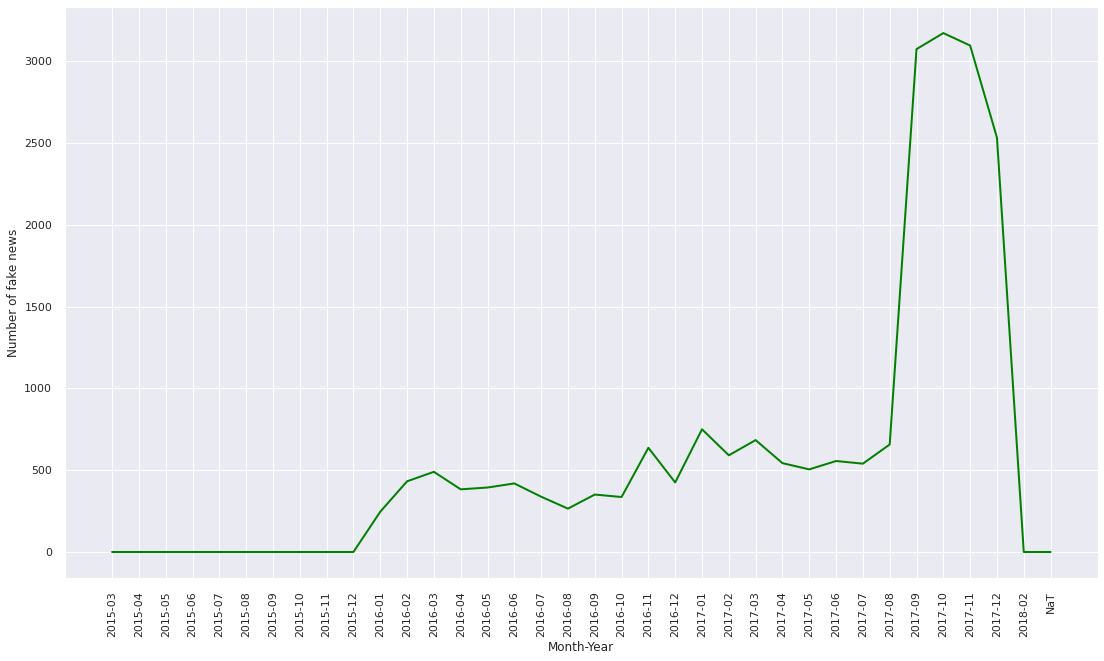

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth=2, color='green')


In [62]:
nlp = news_data

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = nlp[nlp['target'] == 1]['title'].iloc[0:500] # We will take a slice of fake news, to see what vocabulary there looks like
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

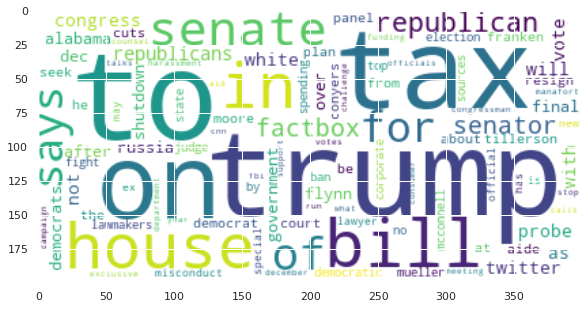

In [65]:
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='bilinear')

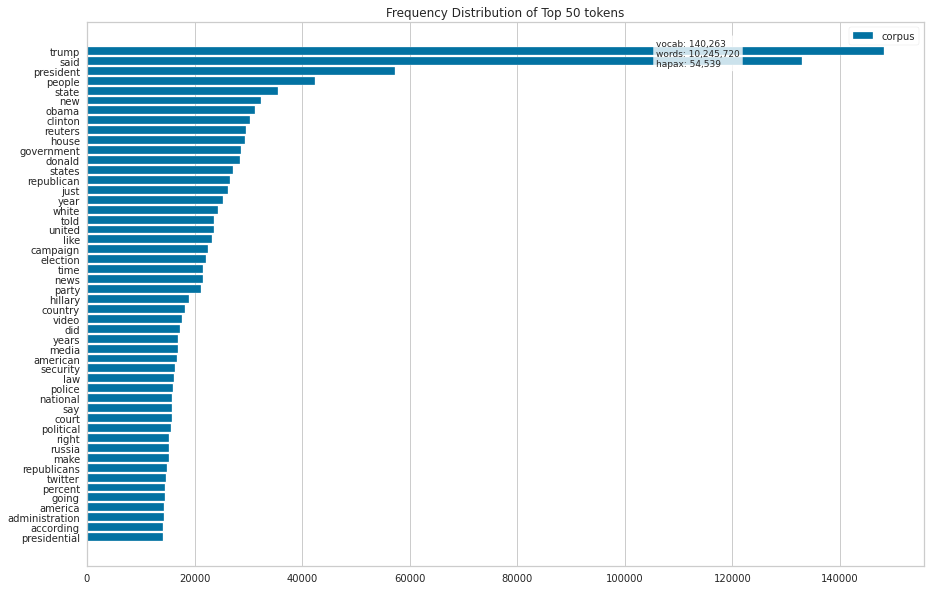

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [77]:
from sklearn.feature_extraction import text 
from yellowbrick.features import RadViz
visualizer = RadViz( size=(1080, 720))
stop_words2 = text.ENGLISH_STOP_WORDS.union(['http', 'https'])
vectorizer = CountVectorizer(stop_words=stop_words2)
docs = vectorizer.fit_transform(news_data['text'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()